In [1]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler


dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

In [2]:
train_df = pd.read_csv('H1.csv', dtype=dtypes)
a=train_df.head()
b=train_df
b
b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
73,1.0,152.0,2015,July,27,2,4.0,10.0,2.0,0.0,...,No Deposit,243,NULL,0.0,Contract,67.58,0.0,0.0,Canceled,2015-04-03
272,0.0,45.0,2015,July,27,2,2.0,3.0,2.0,0.0,...,No Deposit,8,NULL,0.0,Contract,79.50,0.0,0.0,Check-Out,2015-07-07
303,0.0,1.0,2015,July,27,2,0.0,1.0,2.0,0.0,...,No Deposit,240,NULL,0.0,Transient,147.00,1.0,0.0,Check-Out,2015-07-03
339,0.0,130.0,2015,July,27,4,2.0,6.0,2.0,0.0,...,No Deposit,196,NULL,0.0,Transient,96.95,1.0,1.0,Check-Out,2015-07-12
430,0.0,37.0,2015,July,27,1,1.0,4.0,1.0,0.0,...,No Deposit,241,NULL,0.0,Transient,97.29,0.0,1.0,Check-Out,2015-07-06
529,0.0,98.0,2015,July,27,4,2.0,1.0,2.0,0.0,...,No Deposit,8,NULL,0.0,Transient,71.55,1.0,0.0,Check-Out,2015-07-07
756,0.0,150.0,2015,July,27,2,2.0,4.0,2.0,0.0,...,No Deposit,156,NULL,0.0,Contract,55.68,0.0,0.0,Check-Out,2015-07-08
874,0.0,157.0,2015,July,27,4,4.0,6.0,2.0,0.0,...,No Deposit,156,NULL,0.0,Contract,55.68,0.0,0.0,Check-Out,2015-07-14
1182,0.0,1.0,2015,July,27,1,0.0,1.0,1.0,0.0,...,No Deposit,NULL,270,0.0,Transient,134.00,0.0,0.0,Check-Out,2015-07-02
1279,1.0,26.0,2015,July,27,4,2.0,5.0,2.0,2.0,...,No Deposit,240,NULL,0.0,Transient,163.00,0.0,0.0,Canceled,2015-06-09


In [3]:
data=b.apply(lambda col: pd.factorize(col, sort=True)[0])
data

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,80,0,5,30,30,2,4,2,0,...,0,43,0,0,2,2722,1,1,1,143
1,0,76,0,11,38,22,2,7,2,0,...,0,141,0,0,0,826,0,0,1,200
2,1,81,2,8,19,16,0,4,2,2,...,0,43,0,0,2,2044,0,2,0,757
3,0,37,1,7,12,23,1,3,1,0,...,0,44,0,0,2,697,0,2,1,378
4,0,57,2,4,2,16,2,5,2,0,...,0,43,0,0,2,281,0,1,1,680
5,1,187,1,5,31,30,2,5,2,0,...,0,74,0,0,2,2457,0,0,0,318
6,0,1,1,3,7,16,0,2,1,0,...,0,0,40,0,2,370,1,0,1,340
7,0,142,2,1,33,25,2,5,2,0,...,0,151,0,0,2,2711,0,0,1,901
8,1,65,1,10,40,3,0,1,2,0,...,0,43,0,0,2,1226,0,0,0,520
9,1,119,1,8,19,12,2,2,2,0,...,0,43,0,0,2,1424,0,2,0,308


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
IsCanceled = data['IsCanceled']
y = IsCanceled

In [6]:
leadtime = data['LeadTime'] #1
staysweekendnights = data['StaysInWeekendNights'] #2
staysweeknights = data['StaysInWeekNights'] #3
adults = data['Adults'] #4
children = data['Children'] #5
babies = data['Babies'] #6
meal = data['Meal'] #7
country = data['Country'] #8
marketsegment = data['MarketSegment'] #9
distributionchannel = data['DistributionChannel'] #10
isrepeatedguest = data['IsRepeatedGuest'] #11
previouscancellations = data['PreviousCancellations'] #12
previousbookingsnotcanceled = data['PreviousBookingsNotCanceled'] #13
reservedroomtype = data['ReservedRoomType'] #14
assignedroomtype = data['AssignedRoomType'] #15
bookingchanges = data['BookingChanges'] #16
deptype = data['DepositType'] #17
agent = data['Agent'] #18
company = data['Company'] #19
dayswaitinglist = data['DaysInWaitingList'] #20
custype = data['CustomerType'] #21
adr = data['ADR'] #22
rcps = data['RequiredCarParkingSpaces'] #23
totalsqr = data['TotalOfSpecialRequests'] #24
reserv = data['ReservationStatus'] #25

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
countrylabel = le.fit_transform(country)
deptypelabel = le.fit_transform(deptype)

In [8]:
type(countrylabel)

numpy.ndarray

In [9]:
type(deptypelabel)

numpy.ndarray

In [10]:
type(y)

pandas.core.series.Series

In [11]:
leadtime=np.array(leadtime)
type(leadtime)

numpy.ndarray

In [12]:
leadtime.shape

(20000,)

In [13]:
deptypelabel.shape

(20000,)

In [14]:
countrylabel.shape

(20000,)

In [15]:
from sklearn.preprocessing import minmax_scale
leadtime = minmax_scale(leadtime)
leadtime

array([0.2020202 , 0.19191919, 0.20454545, ..., 0.24747475, 0.3510101 ,
       0.11616162])

In [16]:
x1 = np.column_stack((leadtime,deptypelabel,countrylabel))
x1 = sm.add_constant(x1, prepend=True)

In [17]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, random_state=0)

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(4,)))
model.add(layers.Dense(1, activation='sigmoid'))

/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/

In [22]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history=model.fit(x1_train,
                  y1_train,
                  epochs=500,
                  batch_size=512,
                  validation_data=(x1_test, y1_test))

W0814 13:17:59.282916 140313227372352 deprecation.py:323] From /home/michaeljgrogan/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 15000 samples, validate on 5000 samples
Epoch 1/500
15000/15000 [==============================] - 1s 100us/sample - loss: 1.3946 - acc: 0.4633 - val_loss: 0.7325 - val_acc: 0.4940
Epoch 2/500
15000/15000 [==============================] - 0s 9us/sample - loss: 0.7447 - acc: 0.5000 - val_loss: 0.7285 - val_acc: 0.4410
Epoch 3/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.7250 - acc: 0.4658 - val_loss: 0.7250 - val_acc: 0.4936
Epoch 4/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.7208 - acc: 0.5012 - val_loss: 0.7212 - val_acc: 0.4934
Epoch 5/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.7170 - acc: 0.5026 - val_loss: 0.7172 - val_acc: 0.4994
Epoch 6/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.7130 - acc: 0.5070 - val_loss: 0.7130 - val_acc: 0.4994
Epoch 7/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.7091 - acc: 0.5070 - val_loss: 0

15000/15000 [==============================] - 0s 8us/sample - loss: 0.6037 - acc: 0.6767 - val_loss: 0.6026 - val_acc: 0.6416
Epoch 60/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.6038 - acc: 0.6783 - val_loss: 0.6018 - val_acc: 0.6408
Epoch 61/500
15000/15000 [==============================] - 0s 7us/sample - loss: 0.6026 - acc: 0.6777 - val_loss: 0.6013 - val_acc: 0.6416
Epoch 62/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.6021 - acc: 0.6727 - val_loss: 0.6001 - val_acc: 0.7114
Epoch 63/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.6017 - acc: 0.6838 - val_loss: 0.5997 - val_acc: 0.7100
Epoch 64/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.6012 - acc: 0.6962 - val_loss: 0.5998 - val_acc: 0.6412
Epoch 65/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.6008 - acc: 0.6879 - val_loss: 0.5989 - val_acc: 0.7096
Epoch 66/500
15000/15000 [=======

15000/15000 [==============================] - 0s 8us/sample - loss: 0.5969 - acc: 0.6971 - val_loss: 0.5941 - val_acc: 0.6960
Epoch 118/500
15000/15000 [==============================] - 0s 9us/sample - loss: 0.5968 - acc: 0.6968 - val_loss: 0.5949 - val_acc: 0.7052
Epoch 119/500
15000/15000 [==============================] - 0s 10us/sample - loss: 0.5980 - acc: 0.6789 - val_loss: 0.5946 - val_acc: 0.6858
Epoch 120/500
15000/15000 [==============================] - 0s 10us/sample - loss: 0.5973 - acc: 0.6913 - val_loss: 0.5951 - val_acc: 0.6840
Epoch 121/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5991 - acc: 0.6725 - val_loss: 0.5945 - val_acc: 0.6864
Epoch 122/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5973 - acc: 0.6951 - val_loss: 0.5941 - val_acc: 0.7010
Epoch 123/500
15000/15000 [==============================] - ETA: 0s - loss: 0.5934 - acc: 0.692 - 0s 8us/sample - loss: 0.5970 - acc: 0.6910 - val_loss: 0.5940 - val

Epoch 175/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5969 - acc: 0.6938 - val_loss: 0.5939 - val_acc: 0.6976
Epoch 176/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5969 - acc: 0.6967 - val_loss: 0.5947 - val_acc: 0.7054
Epoch 177/500
15000/15000 [==============================] - 0s 9us/sample - loss: 0.5973 - acc: 0.6918 - val_loss: 0.5943 - val_acc: 0.7056
Epoch 178/500
15000/15000 [==============================] - 0s 11us/sample - loss: 0.5968 - acc: 0.6991 - val_loss: 0.5961 - val_acc: 0.6900
Epoch 179/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5973 - acc: 0.6961 - val_loss: 0.5946 - val_acc: 0.7054
Epoch 180/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5969 - acc: 0.6981 - val_loss: 0.5953 - val_acc: 0.7042
Epoch 181/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5977 - acc: 0.6850 - val_loss: 0.5946 - val_acc: 0.7054
Epoch 182/50

15000/15000 [==============================] - 0s 8us/sample - loss: 0.5966 - acc: 0.6985 - val_loss: 0.5939 - val_acc: 0.6972
Epoch 234/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5974 - acc: 0.6929 - val_loss: 0.5952 - val_acc: 0.6844
Epoch 235/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5973 - acc: 0.6848 - val_loss: 0.5952 - val_acc: 0.6844
Epoch 236/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5968 - acc: 0.6974 - val_loss: 0.5939 - val_acc: 0.6970
Epoch 237/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5969 - acc: 0.6896 - val_loss: 0.5940 - val_acc: 0.7012
Epoch 238/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5976 - acc: 0.6951 - val_loss: 0.5948 - val_acc: 0.7050
Epoch 239/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5970 - acc: 0.6819 - val_loss: 0.5944 - val_acc: 0.6866
Epoch 240/500
15000/15000 [

15000/15000 [==============================] - 0s 8us/sample - loss: 0.5971 - acc: 0.6892 - val_loss: 0.5939 - val_acc: 0.6978
Epoch 292/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5970 - acc: 0.7004 - val_loss: 0.5939 - val_acc: 0.6988
Epoch 293/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5970 - acc: 0.6992 - val_loss: 0.5948 - val_acc: 0.7052
Epoch 294/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5966 - acc: 0.6990 - val_loss: 0.5942 - val_acc: 0.7040
Epoch 295/500
15000/15000 [==============================] - 0s 9us/sample - loss: 0.5971 - acc: 0.6845 - val_loss: 0.5942 - val_acc: 0.7038
Epoch 296/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5969 - acc: 0.6967 - val_loss: 0.5939 - val_acc: 0.6964
Epoch 297/500
15000/15000 [==============================] - 0s 9us/sample - loss: 0.5970 - acc: 0.6965 - val_loss: 0.5948 - val_acc: 0.6844
Epoch 298/500
15000/15000 [

15000/15000 [==============================] - 0s 8us/sample - loss: 0.5967 - acc: 0.7003 - val_loss: 0.5942 - val_acc: 0.6872
Epoch 350/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5970 - acc: 0.6861 - val_loss: 0.5942 - val_acc: 0.7040
Epoch 351/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5975 - acc: 0.6932 - val_loss: 0.5943 - val_acc: 0.7044
Epoch 352/500
15000/15000 [==============================] - 0s 7us/sample - loss: 0.5971 - acc: 0.6917 - val_loss: 0.5942 - val_acc: 0.7052
Epoch 353/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5976 - acc: 0.6835 - val_loss: 0.5939 - val_acc: 0.6982
Epoch 354/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5968 - acc: 0.6895 - val_loss: 0.5947 - val_acc: 0.6848
Epoch 355/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5987 - acc: 0.6833 - val_loss: 0.5946 - val_acc: 0.6856
Epoch 356/500
15000/15000 [

15000/15000 [==============================] - 0s 8us/sample - loss: 0.5970 - acc: 0.6975 - val_loss: 0.5953 - val_acc: 0.7034
Epoch 408/500
15000/15000 [==============================] - 0s 10us/sample - loss: 0.5963 - acc: 0.6983 - val_loss: 0.5938 - val_acc: 0.6974
Epoch 409/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5972 - acc: 0.6925 - val_loss: 0.5942 - val_acc: 0.7054
Epoch 410/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5967 - acc: 0.6920 - val_loss: 0.5941 - val_acc: 0.6872
Epoch 411/500
15000/15000 [==============================] - 0s 9us/sample - loss: 0.5968 - acc: 0.6941 - val_loss: 0.5938 - val_acc: 0.6964
Epoch 412/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5974 - acc: 0.6929 - val_loss: 0.5940 - val_acc: 0.7028
Epoch 413/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5973 - acc: 0.6908 - val_loss: 0.5962 - val_acc: 0.6668
Epoch 414/500
15000/15000 

15000/15000 [==============================] - 0s 8us/sample - loss: 0.5970 - acc: 0.6901 - val_loss: 0.5938 - val_acc: 0.6944
Epoch 466/500
15000/15000 [==============================] - 0s 7us/sample - loss: 0.5973 - acc: 0.6909 - val_loss: 0.5937 - val_acc: 0.6980
Epoch 467/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5966 - acc: 0.6888 - val_loss: 0.5937 - val_acc: 0.6974
Epoch 468/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5966 - acc: 0.6984 - val_loss: 0.5937 - val_acc: 0.6966
Epoch 469/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5973 - acc: 0.6939 - val_loss: 0.5956 - val_acc: 0.6808
Epoch 470/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5969 - acc: 0.6867 - val_loss: 0.5982 - val_acc: 0.6340
Epoch 471/500
15000/15000 [==============================] - 0s 8us/sample - loss: 0.5972 - acc: 0.6898 - val_loss: 0.5938 - val_acc: 0.6938
Epoch 472/500
15000/15000 [

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


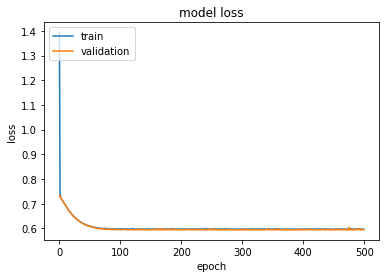

In [23]:
import matplotlib.pyplot as plt

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

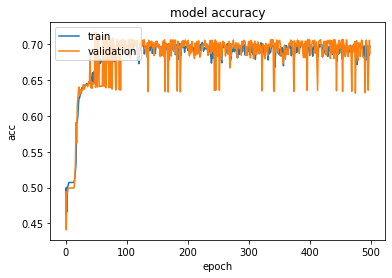

In [24]:
# "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [25]:
pred=model.predict(x1_test)

AUC: 0.747


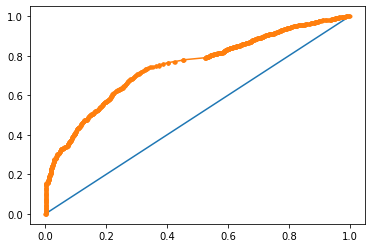

In [26]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

falsepos, truepos, thresholds = roc_curve(y1_test, pred)

auc = roc_auc_score(y1_test, pred)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y1_test, pred)
plt.plot([0, 1], [0, 1], linestyle='-')
plt.plot(falsepos, truepos, marker='.')
plt.show()

In [27]:
h2data = pd.read_csv('H2.csv', dtype=dtypes)
a=h2data.head()
b=h2data
b

seconddata=b.apply(lambda col: pd.factorize(col, sort=True)[0])
seconddata

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,1,73,2,0,13,2,1,1,2,0,...,0,155,0,0,2,753,0,0,0,621
1,0,9,2,7,11,22,1,3,2,0,...,0,141,0,0,2,1784,0,1,1,653
2,0,39,0,1,32,9,1,1,2,0,...,0,1,0,0,3,122,0,0,1,62
3,0,4,2,3,6,16,1,2,2,0,...,0,73,0,0,0,192,0,0,1,618
4,1,222,1,5,27,5,1,4,2,0,...,0,155,0,0,0,606,0,1,0,184
5,1,30,0,11,39,29,0,2,2,0,...,1,83,0,0,2,1155,0,0,0,96
6,0,6,0,1,34,22,1,0,2,0,...,0,155,0,0,0,407,0,0,1,74
7,0,6,0,2,49,9,0,2,2,0,...,0,136,0,0,3,0,0,1,1,182
8,1,230,1,11,36,5,0,5,2,0,...,0,116,0,0,3,1376,0,0,0,277
9,0,65,0,10,40,7,0,3,2,0,...,0,70,0,0,2,260,0,0,1,121


In [28]:
t_leadtime = seconddata['LeadTime'] #1
t_staysweekendnights = seconddata['StaysInWeekendNights'] #2
t_staysweeknights = seconddata['StaysInWeekNights'] #3
t_adults = seconddata['Adults'] #4
t_children = seconddata['Children'] #5
t_babies = seconddata['Babies'] #6
t_meal = seconddata['Meal'] #7
t_country = seconddata['Country'] #8
t_marketsegment = seconddata['MarketSegment'] #9
t_distributionchannel = seconddata['DistributionChannel'] #10
t_isrepeatedguest = seconddata['IsRepeatedGuest'] #11
t_previouscancellations = seconddata['PreviousCancellations'] #12
t_previousbookingsnotcanceled = seconddata['PreviousBookingsNotCanceled'] #13
t_reservedroomtype = seconddata['ReservedRoomType'] #14
t_assignedroomtype = seconddata['AssignedRoomType'] #15
t_bookingchanges = seconddata['BookingChanges'] #16
t_deptype = seconddata['DepositType'] #17
t_t_agent = seconddata['Agent'] #18
t_company = seconddata['Company'] #19
t_dayswaitinglist = seconddata['DaysInWaitingList'] #20
t_custype = seconddata['CustomerType'] #21
t_adr = seconddata['ADR'] #22
t_rcps = seconddata['RequiredCarParkingSpaces'] #23
t_totalsqr = seconddata['TotalOfSpecialRequests'] #24
t_reserv = seconddata['ReservationStatus'] #25

In [29]:
letwo = preprocessing.LabelEncoder()
countrylabeltwo = letwo.fit_transform(t_country)
deptypelabeltwo = letwo.fit_transform(t_deptype)

In [30]:
t_leadtime=np.array(t_leadtime)

In [31]:
lttest = minmax_scale(t_leadtime)
lttest

array([0.16590909, 0.02045455, 0.08863636, ..., 0.61136364, 0.26818182,
       0.03636364])

In [32]:
t1 = np.column_stack((lttest,deptypelabeltwo,countrylabeltwo))
t1 = sm.add_constant(t1, prepend=True)

In [33]:
IsCanceled = seconddata['IsCanceled']
b = IsCanceled
b=b.values

In [34]:
prh2 = model.predict(t1)
prh2

array([[0.16380712],
       [0.4491285 ],
       [0.4864677 ],
       ...,
       [0.58372265],
       [0.6010676 ],
       [0.45780575]], dtype=float32)

AUC: 0.755


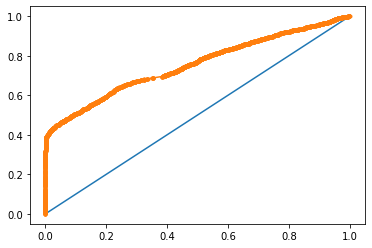

In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

falsepos, truepos, thresholds = roc_curve(b, prh2)

auc = roc_auc_score(b, prh2)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(b, prh2)
plt.plot([0, 1], [0, 1], linestyle='-')
plt.plot(falsepos, truepos, marker='.')
plt.show()